In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

In [ ]:
#Loading data in dataframe
df = pd.read_csv('companies.csv', encoding= 'latin1', header = 0)
df = df.drop([df.columns[0]], axis = 1)
df.head()           

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               66367 non-null  object
 1   homepage_url       61310 non-null  object
 2   category_list      63220 non-null  object
 3   funding_total_usd  66368 non-null  object
 4   status             66368 non-null  object
 5   country_code       59410 non-null  object
 6   state_code         57821 non-null  object
 7   region             58338 non-null  object
 8   city               58340 non-null  object
 9   funding_rounds     66368 non-null  int64 
 10  founded_at         51147 non-null  object
 11  first_funding_at   66344 non-null  object
 12  last_funding_at    66368 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.6+ MB
None


Percentage of missing values in each column
name                  0.001507
homepage_url          7.621143
category_list         

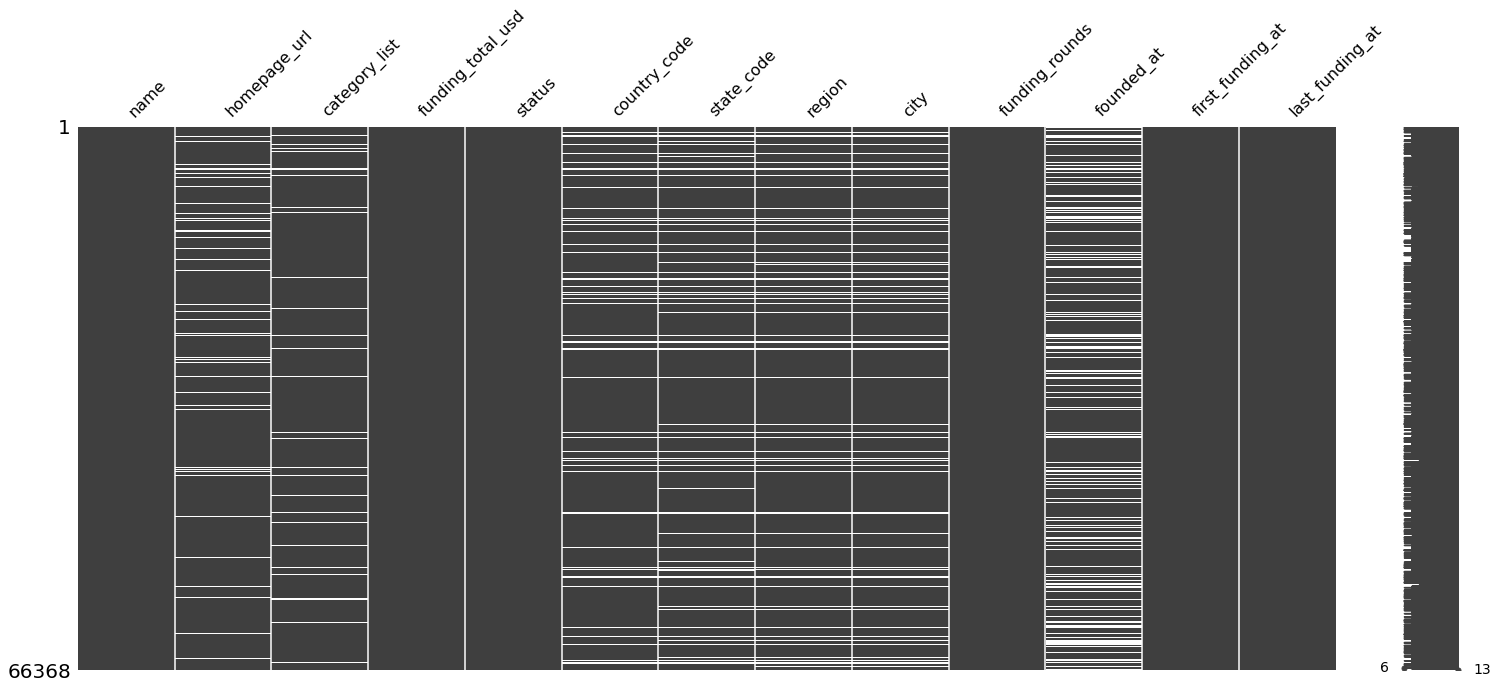

In [ ]:
#General info about data
print(df.info())
print('\n')

#Missing values
print('Percentage of missing values in each column')
print(df.isna().mean() * 100)
mn.matrix(df)



In [ ]:
#Understanding missing values data
df.loc[df.name.isna(),['homepage_url','status','country_code']]

,homepage_url,status,country_code
56916,http://tellitin10.com,closed,USA


In [ ]:
#Assess dtype of funding_total_usd column
print(df.funding_total_usd.str.isnumeric().value_counts())
print('\n')
print(df.funding_total_usd[df.funding_total_usd.str.isalnum() == False].value_counts())

True     52650
False    13718
Name: funding_total_usd, dtype: int64


-              12785
27391.45679        4
42446.96656        2
94244.78512        2
54782.91357        2
               ...  
374157.9578        1
1566772.486        1
1430645.486        1
608507.5811        1
4324801.953        1
Name: funding_total_usd, Length: 920, dtype: int64


In [54]:
#Function to clean data (handle missing values, categorical variables, ambiguity in data representation like date format etc

def clean_data(df):
  #missing values 
  #(the main features of interest are 'name','category_list','funding_total_usd','country_code','region')
  df.dropna(subset = ['name','category_list','funding_total_usd','country_code','region'])

  #Categorical Variables
  #Clean '-' values from 'funding_total_usd' column
  df = df[df.funding_total_usd != '-']
  #Updating dtype
  df.funding_total_usd = df.funding_total_usd.apply(lambda x: float(x))

  #Extracting subset of mid size companies based on valuation (eliminating very small & very big companies)
  df = df[(df.funding_total_usd > 10000000) & (df.funding_total_usd < 100000000)]  #comapnies that raides between $10mn and $200mn

  return df

In [56]:
df = clean_data(df)
print(df.shape, df.info)

(11628, 13) <bound method DataFrame.info of                                       name  ... last_funding_at
7                                   H2O.ai  ...      2015-11-09
21     Beijing 1000CHI Software Technology  ...      2010-04-01
25                                 ZenChef  ...      2015-11-04
32                                1010data  ...      2010-03-08
40                            10X Genomics  ...      2015-01-12
...                                    ...  ...             ...
66350              Zynerba Pharmaceuticals  ...      2014-10-14
66353                             Zyngenia  ...      2010-09-09
66354                              Zynstra  ...      2014-07-09
66355                               ZYOMYX  ...      2014-03-26
66358                     Zyraz Technology  ...      2013-02-15

[11628 rows x 13 columns]>


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [57]:
df.pivot_table(values = 'funding_total_usd', index = 'category_list', aggfunc= 'mean')

,funding_total_usd
category_list,
3D,1.448168e+07
3D Printing|3D Technology|Manufacturing|Photography,3.129900e+07
3D Printing|3D Technology|Startups,1.400000e+07
3D Printing|Cloud Computing|Consulting|E-Commerce,1.140000e+07
3D Printing|Digital Signage|Printing,3.800000e+07
...,...
Wireless,1.817316e+07
iPad|News,1.230000e+07
iPhone|Lifestyle|Online Shopping|Retail,4.000000e+07


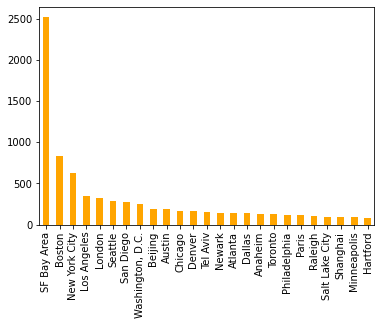

In [58]:
#Top 25 regions in terms of number of companies
df.region.value_counts()[:25].plot.bar(color ='orange')

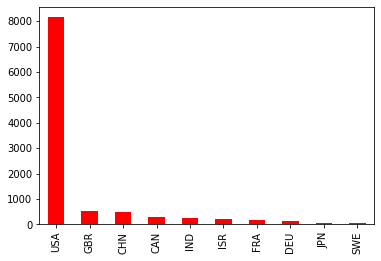

In [59]:
#Top 10 countries in terms of number of companies
df.country_code.value_counts()[:10].plot.bar(color ='red')

In [60]:
df.nlargest(15, 'funding_total_usd')

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
10978,ChoiceStream,http://www.choicestream.com,Advertising,99800000.0,operating,USA,MA,Boston,Boston,8,2001-09-01,2000-01-01,2015-09-17
1129,Active Implants,http://www.activeimplants.com,Biotechnology,99717506.0,operating,USA,TN,Memphis,Memphis,11,2004-06-01,2004-12-23,2013-08-28
15759,Dilithium Networks,http://onmobile.com,Digital Media|Mobile,99670000.0,closed,USA,CA,Napa Valley,Petaluma,8,2001-01-01,2003-04-23,2010-06-09
9994,Casa Systems,http://casa-systems.com,Web Hosting,99614399.0,operating,USA,MA,Boston,Andover,2,2003-01-01,2009-07-08,2010-05-10
4027,AqueSys,http://www.tif.net/portfolio_aquesys.htm,Health Care|Medical Devices,99600000.0,acquired,USA,CA,Anaheim,Irvine,4,2006-01-01,2008-07-23,2014-01-16
12801,Concert Pharmaceuticals,http://www.concertpharma.com,Biotechnology|Health Care,99500000.0,ipo,USA,MA,Boston,Lexington,4,2006-01-01,2006-07-17,2011-06-20
39239,Nextnav,http://www.nextnav.com,Navigation|Utilities,99184501.0,operating,USA,CA,SF Bay Area,Sunnyvale,3,2007-01-01,2011-11-16,2014-07-24
34376,Marrone Bio Innovations,http://www.marroneorganicinnovations.com,Biotechnology|Chemicals,99150000.0,ipo,USA,CA,Sacramento,Davis,6,2006-01-01,2007-05-02,2015-08-21
60987,Vaccinogen,http://www.vaccinogeninc.com,Biotechnology,99051350.0,ipo,USA,MD,Hagerstown,Frederick,5,2007-01-01,2008-12-03,2014-08-25
27089,Immune Design,http://www.immunedesign.com,Biotechnology|Health Care|Therapeutics,99031500.0,ipo,USA,WA,Seattle,Seattle,5,2008-01-01,2008-07-07,2014-06-12


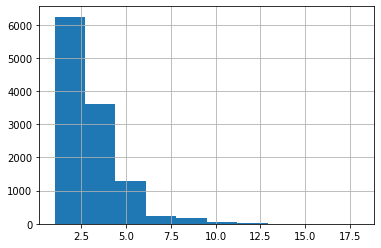

In [61]:
df.funding_rounds.hist()

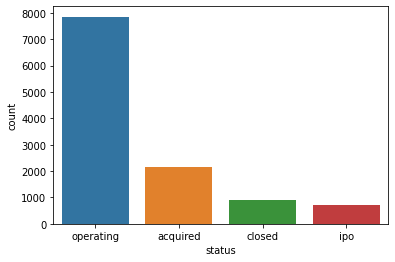

In [62]:
sns.countplot(df.status)

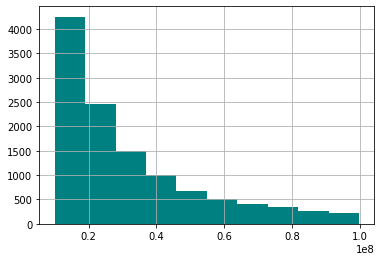

In [63]:
#Distribution of funding amounts
df.funding_total_usd.hist(color = 'teal')

In [64]:
df.funding_total_usd.describe()

count    1.162800e+04
mean     3.143736e+07
std      2.118723e+07
min      1.000000e+07
25%      1.500000e+07
50%      2.400000e+07
75%      4.078645e+07
max      9.980000e+07
Name: funding_total_usd, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

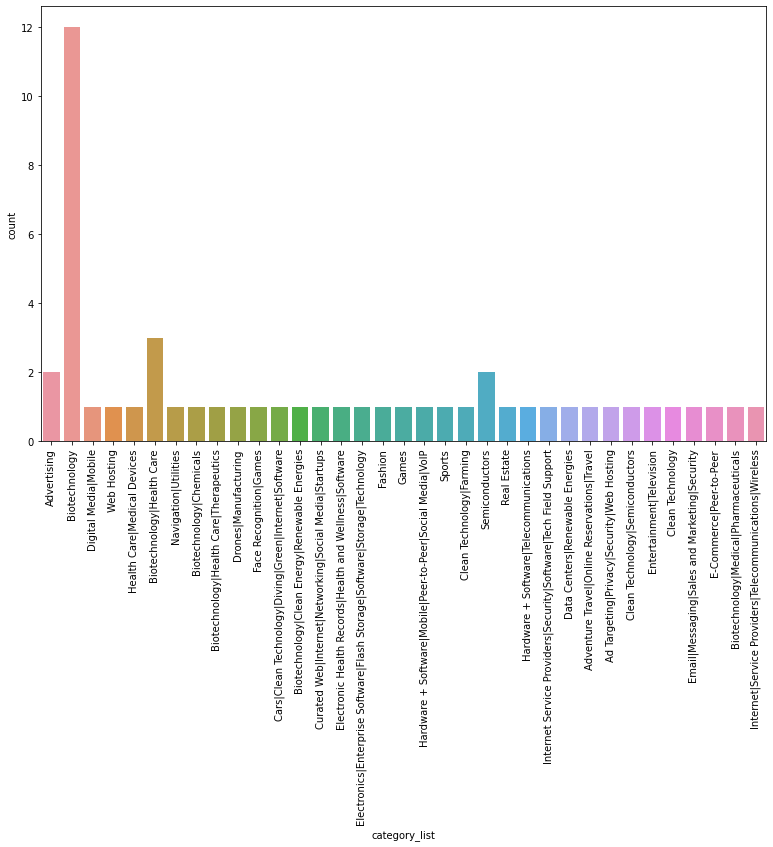

In [65]:
plt.figure(figsize=(13,8))
sns.countplot(df.nlargest(50, 'funding_total_usd').category_list)
plt.xticks(rotation=90)

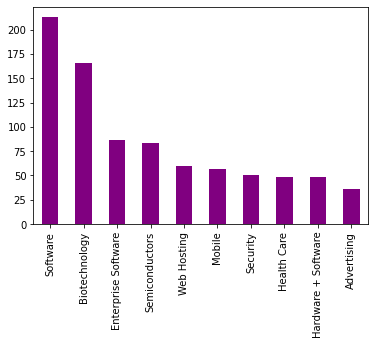

In [66]:
# Top 10 categories in terms of acquired companies
df[df.status == 'acquired'].category_list.value_counts().nlargest(10).plot.bar(color = 'purple')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 936x576 with 0 Axes>

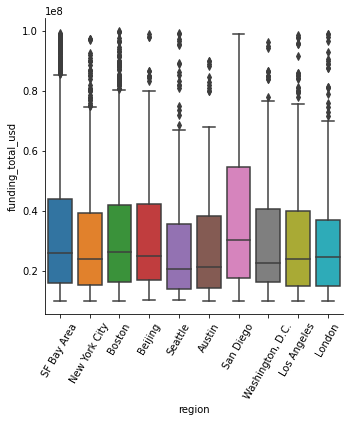

In [67]:
#Visualizing outliers in the top 10 regions
plt.figure(figsize=(13,8))
mask = df.region.isin(list(df.region.value_counts()[:10].index))
sns.catplot(x = 'region', y = 'funding_total_usd', data = df[mask] , kind = 'box')
plt.xticks(rotation=60)
